# **DAT565E-Deep Learning for Prediction of Business Outcomes**

<div class="LI-profile-badge"  data-version="v1" data-size="large" data-locale="en_US" data-type="horizontal" data-theme="light" data-vanity="drsalihtutun"><a class="LI-simple-link" href='https://www.linkedin.com/in/drsalihtutun/en-us?trk=profile-badge'>Salih Tutun, PhD</a></div>

![Imgur](https://i.imgur.com/4HJknC2.png)

# Lab-based Group Assignment 2:
## Customer Churning Prediction in the Telecommunications Sector

Tele-communication business suffers from customer churning. Those companies are especially interested in a customer churn early warning system. One of the most important components in such a system, is to predict whether a customer will churn with existing information. Companies are working hard to survive in this competitive market by using three main strategies:(1) acquire new customers, (2) upsell the existing customers, and (3) increase the retention period of customers. 

**Credit:** Ahmad, Abdelrahim Kasem, Assef Jafar, and Kadan Aljoumaa. "Customer churn prediction in telecom using machine learning in big data platform." Journal of Big Data 6, no. 1 (2019): 28.

<img src="https://miro.medium.com/max/1400/1*Xap6OxaZvD7C7eMQKkaHYQ.jpeg">

### Business Problem

The problem is to detect the potential of customer’s churn for decreasing the potential of customer’s churn, known as “the customer movement from one provider to another”. Therefore, finding factors that increase customer churn is important to take necessary actions to reduce this churn.

## Q1: Please read and load the dataset?

In [2]:
# Mount with Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load Data

In [4]:
import pandas as pd

# read csv
df = pd.read_csv("/content/drive/MyDrive/deep learning/Practice Files - Lab 2/churn.csv")

In [ ]:
df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


## Q2: Please preprocess the dataset for the analysis?

Preprocessing

In [5]:
# Categorical -> dummy variables
df=pd.concat([df,pd.get_dummies(df.State)],axis=1)

# Categorical -> 0,1
df.applymap(lambda x: 0 if x=="No" else (1 if x=="Yes" else x))

# Drop the columns
df.drop(["State","International plan","Voice mail plan"],axis=1,inplace=True)

# Min-max scaling
for col in df.columns[:16]:
    df.loc[:,col]=(df.loc[:,col]-df.loc[:,col].min())/(df.loc[:,col].max()-df.loc[:,col].min())

In [ ]:
df

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0.524793,0.068627,0.50,0.755701,0.68750,0.755701,0.542755,0.582353,0.542866,0.572161,0.436090,0.572152,0.500,0.15,0.500000,0.111111,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.438017,0.068627,0.52,0.460661,0.76875,0.460597,0.537531,0.605882,0.537690,0.599772,0.526316,0.600000,0.685,0.15,0.685185,0.111111,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.561983,0.068627,0.00,0.693843,0.71250,0.693830,0.333242,0.647059,0.333225,0.338457,0.533835,0.338608,0.610,0.25,0.609259,0.000000,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.342975,0.000000,0.00,0.853478,0.44375,0.853454,0.170195,0.517647,0.170171,0.436095,0.421053,0.436076,0.330,0.35,0.329630,0.222222,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.305785,0.068627,0.00,0.475200,0.70625,0.475184,0.407754,0.717647,0.407959,0.407629,0.661654,0.407595,0.505,0.15,0.505556,0.333333,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0.322314,0.068627,0.00,0.383979,0.61250,0.383970,0.521584,0.400000,0.521514,0.505835,0.714286,0.505696,0.590,0.25,0.590741,0.222222,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2662,0.789256,0.068627,0.72,0.445268,0.48125,0.445171,0.592521,0.741176,0.592688,0.670083,0.375940,0.670253,0.495,0.30,0.494444,0.222222,False,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2663,0.276860,0.068627,0.00,0.658780,0.35625,0.658786,0.421776,0.323529,0.421870,0.420154,0.676692,0.420253,0.480,0.20,0.479630,0.333333,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2664,0.111570,1.000000,0.00,0.515393,0.68125,0.515426,0.794061,0.341176,0.794241,0.421862,0.436090,0.422152,0.705,0.30,0.705556,0.222222,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Train-Validation-Test-Split

![Imgur](https://i.imgur.com/mHERxtu.png)

In [7]:
from sklearn.model_selection import train_test_split

# Train-test-validation split
train,_=train_test_split(df,test_size=0.1,stratify=df["Churn"])
validation,test=train_test_split(_,test_size=0.5)
print(train.shape,validation.shape,test.shape)

(2399, 68) (133, 68) (134, 68)


![Imgur](https://i.imgur.com/UK523Ne.png)

## Q3: Please design your model with out using regularization and explain why the results like this?

Without Regularization

In [14]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD


model=Sequential()
model.add(Dense(128,input_shape=(df.shape[1]-1,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid"))



# Used rmsprop optimizer, binary_crossentropy loss
# you can use adam and SGD instead of rmsprop as well
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train.drop("Churn",axis=1),train["Churn"],
                    validation_data=(validation.drop("Churn",axis=1),validation["Churn"]),
          batch_size=16, epochs=100)

Epoch 1/100
150/150 [==============================] - 4s 6ms/step - loss: 0.4277 - accuracy: 0.8537 - val_loss: 0.3842 - val_accuracy: 0.8647
Epoch 2/100
150/150 [==============================] - 1s 4ms/step - loss: 0.3989 - accuracy: 0.8545 - val_loss: 0.3594 - val_accuracy: 0.8647
Epoch 3/100
150/150 [==============================] - 1s 4ms/step - loss: 0.3797 - accuracy: 0.8545 - val_loss: 0.3975 - val_accuracy: 0.8647
Epoch 4/100
150/150 [==============================] - 1s 4ms/step - loss: 0.3669 - accuracy: 0.8566 - val_loss: 0.3444 - val_accuracy: 0.8722
Epoch 5/100
150/150 [==============================] - 1s 4ms/step - loss: 0.3585 - accuracy: 0.8612 - val_loss: 0.3736 - val_accuracy: 0.8496
Epoch 6/100
150/150 [==============================] - 1s 4ms/step - loss: 0.3516 - accuracy: 0.8633 - val_loss: 0.3441 - val_accuracy: 0.8496
Epoch 7/100
150/150 [==============================] - 1s 4ms/step - loss: 0.3448 - accuracy: 0.8658 - val_loss: 0.3363 - val_accuracy: 0.8647

<function matplotlib.pyplot.imshow>

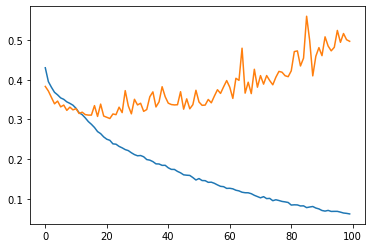

In [20]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow>

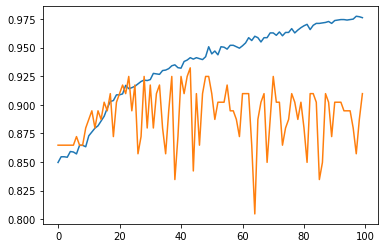

In [21]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [17]:
from keras.losses import binary_crossentropy

# real y
real = test.Churn.astype("int").values
# predicted y
pred = model.predict(test.drop("Churn",axis=1)).flatten()
# binary_crossentropy
print(float(binary_crossentropy(real,pred)))

1.2238492965698242


In [18]:
# calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.7985074626865671


## Underfitting and Overfitting

Here the most common ways to prevent overfitting in neural networks:
* Early stop
* Getting more training data.
* Reducing the capacity of the network.
* Adding weight regularization.
* Adding dropout.

![Imgur](https://i.imgur.com/pzIWFr7.png)

![Imgur](https://i.imgur.com/pQedNv0.png)

### Early Stopping

![Imgur](https://i.imgur.com/pfKKCy8.png)

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2



model=Sequential()
model.add(Dense(128,input_shape=(df.shape[1]-1,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid"))



# Used rmsprop optimizer, binary_crossentropy loss
# you can use adam and SGD instead of rmsprop as well
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train.drop("Churn",axis=1),train["Churn"],
                    validation_data=(validation.drop("Churn",axis=1),validation["Churn"]),
          batch_size=16, epochs=50)

Epoch 1/50
150/150 [==============================] - 1s 6ms/step - loss: 0.4554 - accuracy: 0.8324 - val_loss: 0.3936 - val_accuracy: 0.8647
Epoch 2/50
150/150 [==============================] - 1s 4ms/step - loss: 0.4046 - accuracy: 0.8545 - val_loss: 0.3731 - val_accuracy: 0.8647
Epoch 3/50
150/150 [==============================] - 1s 4ms/step - loss: 0.3886 - accuracy: 0.8545 - val_loss: 0.3621 - val_accuracy: 0.8647
Epoch 4/50
150/150 [==============================] - 1s 4ms/step - loss: 0.3731 - accuracy: 0.8545 - val_loss: 0.3497 - val_accuracy: 0.8647
Epoch 5/50
150/150 [==============================] - 1s 4ms/step - loss: 0.3651 - accuracy: 0.8545 - val_loss: 0.3584 - val_accuracy: 0.8647
Epoch 6/50
150/150 [==============================] - 1s 3ms/step - loss: 0.3568 - accuracy: 0.8541 - val_loss: 0.3547 - val_accuracy: 0.8647
Epoch 7/50
150/150 [==============================] - 1s 4ms/step - loss: 0.3454 - accuracy: 0.8574 - val_loss: 0.3477 - val_accuracy: 0.8346
Epoch 

<function matplotlib.pyplot.imshow>

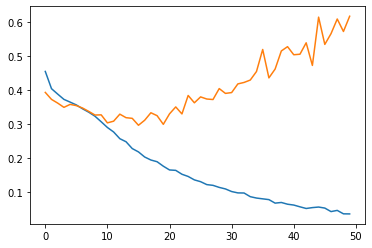

In [26]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow>

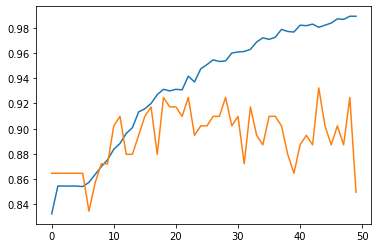

In [27]:
import matplotlib.pyplot as plt
# Plot loss, val_loss
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [28]:
from keras.losses import binary_crossentropy

# real y
real = test.Churn.astype("int").values
# predicted y
pred = model.predict(test.drop("Churn",axis=1)).flatten()
# binary_crossentropy
print(float(binary_crossentropy(real,pred)))

0.7116876244544983


In [29]:
# calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.8208955223880597


## Q4: How you can solve the problem and improve your model?

Use Dropout

In [30]:
# Dropout
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2

# Drop out used at the first two layers
model=Sequential()
model.add(Dense(128,input_shape=(df.shape[1]-1,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train.drop("Churn",axis=1),train["Churn"],
                    validation_data=(validation.drop("Churn",axis=1),validation["Churn"]),
          batch_size=16, epochs=100)

Epoch 1/100
150/150 [==============================] - 2s 6ms/step - loss: 0.6718 - accuracy: 0.8087 - val_loss: 0.6351 - val_accuracy: 0.8647
Epoch 2/100
150/150 [==============================] - 1s 4ms/step - loss: 0.4483 - accuracy: 0.8545 - val_loss: 0.3836 - val_accuracy: 0.8647
Epoch 3/100
150/150 [==============================] - 1s 4ms/step - loss: 0.4083 - accuracy: 0.8545 - val_loss: 0.3705 - val_accuracy: 0.8647
Epoch 4/100
150/150 [==============================] - 1s 4ms/step - loss: 0.3871 - accuracy: 0.8545 - val_loss: 0.3624 - val_accuracy: 0.8647
Epoch 5/100
150/150 [==============================] - 1s 4ms/step - loss: 0.3725 - accuracy: 0.8545 - val_loss: 0.3394 - val_accuracy: 0.8647
Epoch 6/100
150/150 [==============================] - 1s 4ms/step - loss: 0.3670 - accuracy: 0.8570 - val_loss: 0.3587 - val_accuracy: 0.8647
Epoch 7/100
150/150 [==============================] - 1s 4ms/step - loss: 0.3614 - accuracy: 0.8574 - val_loss: 0.3320 - val_accuracy: 0.8722

<function matplotlib.pyplot.imshow>

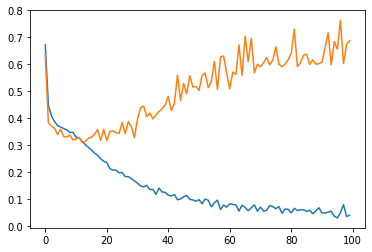

In [31]:
# same as above, plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow>

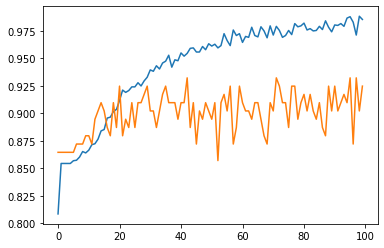

In [32]:
# same as above, plot accuracy, val_accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [33]:
# same as above, calculate  binary_crossentropy
from keras.losses import binary_crossentropy
real = test.Churn.astype("int").values
pred = model.predict(test.drop("Churn",axis=1)).flatten()
print(float(binary_crossentropy(real,pred)))

0.8554563522338867


In [34]:
# Again, calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.8283582089552238


Use L2 Weight Regularization

- Softmax, LR decay, optimizers, units, and layers

In [35]:
# L2

model=Sequential()
# L2 regularization applied at the first hidden layer
model.add(Dense(64,input_shape=(df.shape[1]-1,), activation='relu', kernel_regularizer="l2"))
model.add(Dense(64, activation='relu', kernel_regularizer="l2"))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train.drop("Churn",axis=1),train["Churn"],
                    validation_data=(validation.drop("Churn",axis=1),validation["Churn"]),
          batch_size=16, epochs=100)

Epoch 1/100
150/150 [==============================] - 2s 7ms/step - loss: 0.9581 - accuracy: 0.8441 - val_loss: 0.5134 - val_accuracy: 0.8647
Epoch 2/100
150/150 [==============================] - 1s 5ms/step - loss: 0.4744 - accuracy: 0.8545 - val_loss: 0.4241 - val_accuracy: 0.8647
Epoch 3/100
150/150 [==============================] - 1s 5ms/step - loss: 0.4398 - accuracy: 0.8545 - val_loss: 0.4093 - val_accuracy: 0.8647
Epoch 4/100
150/150 [==============================] - 1s 5ms/step - loss: 0.4277 - accuracy: 0.8545 - val_loss: 0.4060 - val_accuracy: 0.8647
Epoch 5/100
150/150 [==============================] - 1s 6ms/step - loss: 0.4202 - accuracy: 0.8545 - val_loss: 0.3937 - val_accuracy: 0.8647
Epoch 6/100
150/150 [==============================] - 1s 6ms/step - loss: 0.4147 - accuracy: 0.8545 - val_loss: 0.3878 - val_accuracy: 0.8647
Epoch 7/100
150/150 [==============================] - 1s 5ms/step - loss: 0.4115 - accuracy: 0.8545 - val_loss: 0.3842 - val_accuracy: 0.8647

<function matplotlib.pyplot.imshow>

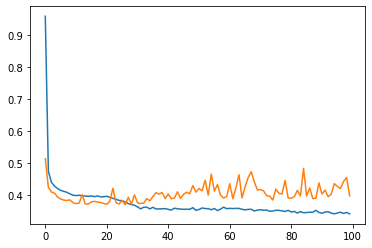

In [36]:
# same as above, plot loss, val_loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow>

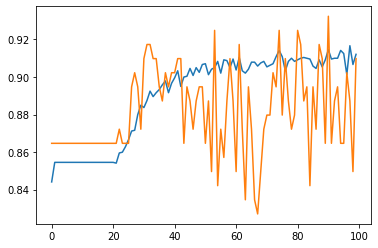

In [37]:
# same as above, plot accuracy, val_accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [38]:
# same as above, calculate  binary_crossentropy
from keras.losses import binary_crossentropy
real = test.Churn.astype("int").values
pred = model.predict(test.drop("Churn",axis=1)).flatten()
print(float(binary_crossentropy(real,pred)))

0.2701556086540222


In [39]:
# Again, calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.9253731343283582


Use L2 + Dropout

In [42]:
# Dropout + L2

model=Sequential()
model.add(Dense(64,input_shape=(df.shape[1]-1,), activation='relu', kernel_regularizer="l2"))
model.add(Dropout(0.15))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.15))
#model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(train.drop("Churn",axis=1),train["Churn"],
                    validation_data=(validation.drop("Churn",axis=1),validation["Churn"]),
          batch_size=16, epochs=100)

Epoch 1/100
150/150 [==============================] - 2s 6ms/step - loss: 0.7439 - accuracy: 0.8378 - val_loss: 0.4846 - val_accuracy: 0.8647
Epoch 2/100
150/150 [==============================] - 1s 4ms/step - loss: 0.4739 - accuracy: 0.8545 - val_loss: 0.4156 - val_accuracy: 0.8647
Epoch 3/100
150/150 [==============================] - 1s 5ms/step - loss: 0.4360 - accuracy: 0.8545 - val_loss: 0.3976 - val_accuracy: 0.8647
Epoch 4/100
150/150 [==============================] - 1s 6ms/step - loss: 0.4211 - accuracy: 0.8545 - val_loss: 0.3810 - val_accuracy: 0.8647
Epoch 5/100
150/150 [==============================] - 1s 5ms/step - loss: 0.4110 - accuracy: 0.8545 - val_loss: 0.3853 - val_accuracy: 0.8647
Epoch 6/100
150/150 [==============================] - 1s 6ms/step - loss: 0.4044 - accuracy: 0.8545 - val_loss: 0.3732 - val_accuracy: 0.8647
Epoch 7/100
150/150 [==============================] - 1s 6ms/step - loss: 0.4002 - accuracy: 0.8545 - val_loss: 0.3693 - val_accuracy: 0.8647

<function matplotlib.pyplot.imshow>

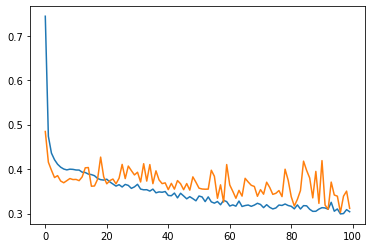

In [43]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.imshow

<function matplotlib.pyplot.imshow>

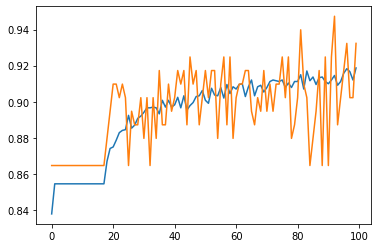

In [44]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.imshow

In [45]:
from keras.losses import binary_crossentropy
real = test.Churn.astype("int").values
pred = model.predict(test.drop("Churn",axis=1)).flatten()
print(float(binary_crossentropy(real,pred)))

0.2829205095767975


In [46]:
# Again, calculate accuracy
pred = [1 if i>0.5 else 0 for i in pred]
print(sum(pred==real)/len(pred))

0.917910447761194


If you have questions, please contact with me.

Salih Tutun, PhD

olin2deeplearning@gmail.com, salihtutun@wustl.edu